In [1]:
import pandas as pd
import numpy as np

In [2]:
loans_data = pd.read_csv('kiva_loans.csv')

In [3]:
loans_data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [5]:
loans_data.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [6]:
loans_data.shape

(671205, 20)

In [7]:
# hypothesis 1:
#a higher percentage of the borrowers are female in specific countries
# so I will separate the borrowers in each country and then determine their percentage of female/male borrowers.

In [8]:
#I want to look at the  gender of the borrowers.
loans_data['borrower_genders'].isnull().sum()

4221

In [9]:
loans_data['region'].unique()

array(['Lahore', 'Maynaguri', 'Abdul Hakeem', ..., 'Gbenikoro Village',
       'Morimaraia', 'alejandria'], dtype=object)

In [10]:
loans_data.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [11]:
loans_data.drop(['funded_amount', 'currency', 'partner_id', 'lender_count', 'tags'], axis=1, inplace=True)

In [12]:
loans_data.shape

(671205, 15)

In [13]:
loans_data.drop(['funded_time', 'posted_time', 'disbursed_time'], axis=1, inplace=True)

In [14]:
loans_data.shape

(671205, 12)

In [15]:
loans_data.dropna(subset=['region', 'borrower_genders'], inplace=True)

In [16]:
loans_data.dropna(subset=['country_code'], inplace=True)
loans_data.isnull().any()
#loans_data.info()
loans_data['use'].fillna(method='ffill').fillna(0)
loans_data['use'].isnull().sum()

5

In [17]:
#Which country borrows most and/or least from Kiva?


In [18]:
#How much is the most borrowed by country?:
#country_max_borrower = kiva_by_country['loan_amount'].sum()

In [19]:
#How much is the least borrowed by country?:

In [20]:
gender = loans_data['borrower_genders']


In [21]:
regions = loans_data['region'].unique()
regions.sort()
regions

array(['"The first May" village', '01 Công Chính', '01 Công Liêm', ...,
       'Đông Sơn, Thanh Hóa', 'Đông Văn - Đông Sơn', 'İZMİT'],
      dtype=object)

In [22]:
loans_data.dropna(axis=1)

,id,loan_amount,activity,sector,country_code,country,region,term_in_months,borrower_genders,repayment_interval,date
0,653051,300.0,Fruits & Vegetables,Food,PK,Pakistan,Lahore,12.0,female,irregular,2014-01-01
1,653053,575.0,Rickshaw,Transportation,PK,Pakistan,Lahore,11.0,"female, female",irregular,2014-01-01
2,653068,150.0,Transportation,Transportation,IN,India,Maynaguri,43.0,female,bullet,2014-01-01
3,653063,200.0,Embroidery,Arts,PK,Pakistan,Lahore,11.0,female,irregular,2014-01-01
4,653084,400.0,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,14.0,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...
671195,1340329,50.0,Livestock,Agriculture,GH,Ghana,Dansoman,13.0,"female, female",monthly,2017-07-25
671196,1340325,250.0,Livestock,Agriculture,GH,Ghana,Dansoman,13.0,female,monthly,2017-07-25
671198,1340331,75.0,Livestock,Agriculture,MX,Mexico,Iztacalco,13.0,female,monthly,2017-07-25
671199,1340318,25.0,Livestock,Agriculture,PY,Paraguay,Concepción,13.0,female,monthly,2017-07-25


In [23]:
loans_data['date'].sample(15)

432707    2016-05-31
121893    2014-09-22
479032    2016-08-24
513278    2016-10-24
581856    2017-02-21
444165    2016-06-22
427248    2016-05-23
187764    2015-02-04
135827    2014-10-21
658746    2017-06-16
189106    2015-02-07
576059    2017-02-13
371274    2016-02-04
304275    2015-09-22
411199    2016-04-21
Name: date, dtype: object

In [24]:
loans_data['dates_parsed'] = pd.to_datetime(loans_data['date'], format='%Y-%m-%d')

In [25]:
loans_data['dates_parsed'].sample(15)

652926   2017-06-07
280753   2015-08-05
185338   2015-01-28
9521     2014-01-27
498048   2016-09-26
201807   2015-03-03
7731     2014-01-23
451893   2016-07-05
362219   2016-01-15
603479   2017-03-23
635411   2017-05-12
635331   2017-05-12
30582    2014-03-13
13645    2014-02-07
580212   2017-02-18
Name: dates_parsed, dtype: datetime64[ns]

In [26]:
loans_data.drop('date', axis=1, inplace=True)

In [27]:
loans_data.columns

Index(['id', 'loan_amount', 'activity', 'sector', 'use', 'country_code',
       'country', 'region', 'term_in_months', 'borrower_genders',
       'repayment_interval', 'dates_parsed'],
      dtype='object')

In [28]:
loans_data.head()

,id,loan_amount,activity,sector,use,country_code,country,region,term_in_months,borrower_genders,repayment_interval,dates_parsed
0,653051,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12.0,female,irregular,2014-01-01
1,653053,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11.0,"female, female",irregular,2014-01-01
2,653068,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,43.0,female,bullet,2014-01-01
3,653063,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,11.0,female,irregular,2014-01-01
4,653084,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,14.0,female,monthly,2014-01-01


In [29]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614397 entries, 0 to 671200
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  614397 non-null  int64         
 1   loan_amount         614397 non-null  float64       
 2   activity            614397 non-null  object        
 3   sector              614397 non-null  object        
 4   use                 614392 non-null  object        
 5   country_code        614397 non-null  object        
 6   country             614397 non-null  object        
 7   region              614397 non-null  object        
 8   term_in_months      614397 non-null  float64       
 9   borrower_genders    614397 non-null  object        
 10  repayment_interval  614397 non-null  object        
 11  dates_parsed        614397 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 60.9+ MB


In [56]:
import matplotlib.pyplot as plt

In [64]:
month_of_loans = loans_data['dates_parsed'].dt.month.unique()
month_of_loans
#month_loans_counts = month_of_loans.value_counts()
#month_loans_counts

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

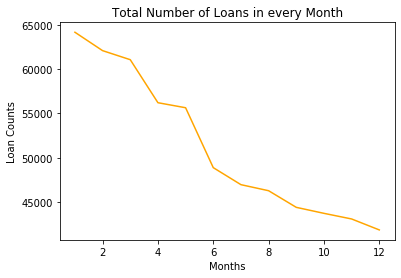

In [62]:
x = month_of_loans
y= month_loans_counts
plt.plot(x,y, color='orange')
plt.xlabel('Months')
plt.ylabel('Loan Counts')
plt.title('Total Number of Loans in every Month')
plt.show()

More loans are being taken in the beginning of a year.
Less loans are taken in the last months of a year.

In [33]:
#a DataFrame of Female borrowers:
female = loans_data[loans_data.borrower_genders == 'female']
female.shape
            

(394365, 12)

In [34]:
#a DataFrame of male borrowers:
male = loans_data[loans_data.borrower_genders == 'male']
male.shape

(120935, 12)

In [35]:
x = female.loan_amount.sum()
print(x)

221422250.0


In [36]:
y = male.loan_amount.sum()
print(y)

99839075.0


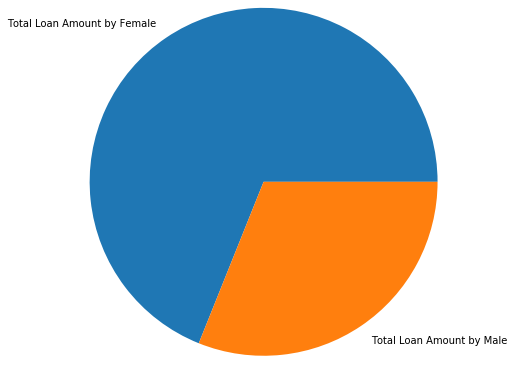

In [37]:
values= [x, y]
labels=['Total Loan Amount by Female', 'Total Loan Amount by Male']
plt.axis('equal')
plt.pie(values, labels=labels, radius=2)
plt.show()

In [68]:
#how many females are in the agriculture sector?
sectors = loans_data['sector'].value_counts()
sectors

Agriculture       169444
Food              123707
Retail            114104
Services           39060
Personal Use       35655
Education          29117
Clothing           28594
Housing            28150
Transportation     14936
Arts               10660
Health              8259
Manufacturing       5791
Construction        5696
Entertainment        621
Wholesale            603
Name: sector, dtype: int64

In [39]:
#female_and_agriculture = loans_data[(loans_data.borrower_genders == 'female') & (loans_data.sector == 'Agriculture')]
#print(female_and_agriculture.loan_amount.value_counts())

In [ ]:
a = female[female['sector'] == 'Agriculture'].unique()
print(a)

In [ ]:
loans_data.loc[loans_data.borrower_genders[:7] == 'female', 'gender'] = 'F'
loans_data.loc[loans_data.borrower_genders[:5] == 'male', 'gender'] = 'M'

In [ ]:
loans_data.head()

In [ ]:
loans_data['gender'] = loans_data[loans_data.borrower_genders[:7]]
loans_data.head()

In [ ]:
loans_data['gender'] = pd.Series()
for each in loans_data['borrower_genders']:
    if each[0] == 'f' or each[0] == 'F':
        loans_data['gender'].append('F')
    elif each[0] == 'm' or each[0] == 'M':
        loans_data['gender'].append('M')
    else:
        loans_data['gender'].append('None')
loans_data['gender']